# Key Features

In [2]:
# import useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('all')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/blanchekerorgant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/blanchekerorgant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/blanchekerorgant/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/blanchekerorgant/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/blanchekerorgant/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/b

[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package bllip_wsj_no_aux to
[nltk_data]    |     /Users/blanchekerorgant/nltk_data...
[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package book_grammars to
[nltk_data]    |     /Users/blanchekerorgant/nltk_data...
[nltk_data]    |   Package book_grammars is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/blanchekerorgant/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/blanchekerorgant/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/blanchekerorgant/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to
[nltk_data]    |     /Users/blanc

True

In [3]:
# importing the data

movies=pd.read_csv('Data/success_data.csv')
movies.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Box_office_adjusted,...,Revenu_standardized,Profit_standardized,imdb_rating_standardized,Success_indicator,Actor_name,Freebase_character_ID,Famous_actors_count,IsFamousStudio,IsFamousDirector,Budget_standardized
0,0,3217,/m/014hr,Army of Darkness,1992,21502796.0,81.0,['United States of America'],horror,3.518918e+07,...,-0.234513,-0.287812,1.176074,0.470781,"['Ted Raimi', 'Ivan Raimi', 'Bruce Campbell', ...","/m/0hgcnkq, /m/089hc6, /m/06_krl, /m/0jtgxg3, ...",0,1,0,-0.052560
1,1,3947,/m/0191n,Blue Velvet,1986,8551228.0,120.0,['United States of America'],thriller,1.791389e+07,...,-0.389376,-0.394083,1.491826,0.551225,"['Dick Green', 'Isabella Rossellini', 'Kyle Ma...","/m/0hgw_bt, /m/0gz5lsj, /m/0h39qn5, /m/0hgw_dk...",0,0,1,-0.219767
2,2,4231,/m/01cbx,Buffy the Vampire Slayer,1992,16624456.0,86.0,['United States of America'],action,2.720581e+07,...,-0.292844,-0.300710,-0.613190,-0.453017,"['Kristy Swanson', 'Donald Sutherland', 'Paul ...","/m/0b41h, /m/0h5s5mz, /m/0h5s5p6, /m/0h2n0pr, ...",0,1,0,-0.254054
3,3,4728,/m/01hq1,Batman Returns,1992,266822354.0,126.0,"['United States of America', 'United Kingdom']",thriller,4.366530e+08,...,2.698799,2.301351,0.860321,1.779560,"['Cristi Conaway', 'Michael Gough', 'Pat Hingl...","/m/0h5rr59, /m/02r129, /m/031v20, /m/0h5rr4q, ...",1,1,0,3.423226
4,4,5224,/m/01lsl,Citizen Kane,1941,1585634.0,119.0,['United States of America'],thriller,2.476609e+07,...,-0.472665,-0.337500,2.123331,0.825333,"['Dorothy Comingore', 'Erskine Sanford', 'Ever...","/m/04vwr27, /m/04vwr0s, /m/04vwr2j, /m/04vwq_x...",0,1,1,-0.202948


### Graph title length (words, characters)

In [4]:
# Helper function to count the words in movie titles
def count_words(x):
    # remove eventual spaces at the beginning and at the end of the string, split the string, count the words
    return len(x.strip().split())

In [5]:
# Add column with title length
movies['Title_length'] = movies['Movie_name'].apply(count_words)


Text(0.5, 0.98, 'Join distributions of Success & title length')

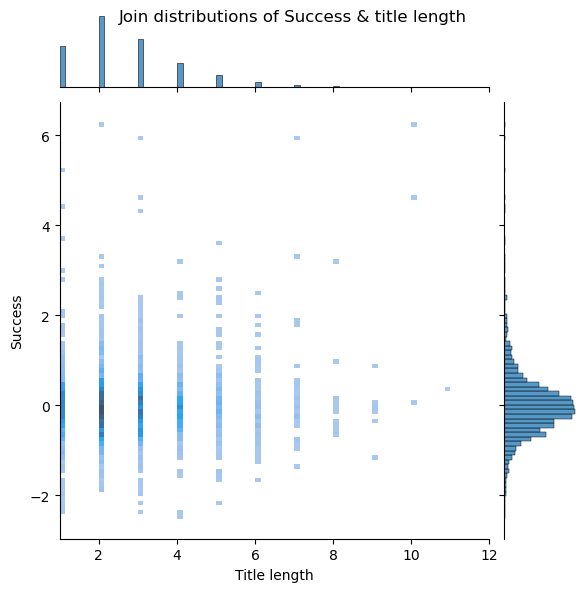

In [6]:
# Plot the join distributions of audience IMdB rating & title length
# As there are more short titles, looking only at the mean rating for each title length is biased

jplot = sns.jointplot(x='Title_length', y='Success_indicator', data=movies, kind='hist', xlim=(1,12))
#jplot = sns.jointplot(x='Title_length', y='Audience_imdb_rating', data=cmu_imdb, kind='hist', xlim=(1,12))

plt.xlabel('Title length')
plt.ylabel('Success') # TO CHANGE WITH FINAL DATAFRAME
jplot.fig.suptitle('Join distributions of Success & title length')

In [7]:
# Add column with title length
movies['Title_characters'] = movies['Movie_name'].apply(len)


Text(0.5, 0.98, 'Join distributions of Success & number of characters in title')

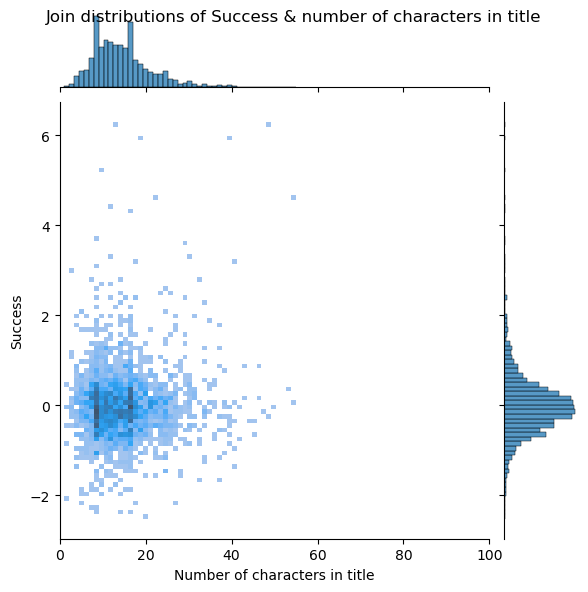

In [8]:
# Plot the join distributions of success indicator & number of characters in the title

jplot = sns.jointplot(x='Title_characters', y='Success_indicator', data=movies, kind='hist',xlim=(0,100))

plt.xlabel('Number of characters in title')
plt.ylabel('Success') # TO CHANGE WITH FINAL DATAFRAME
jplot.fig.suptitle('Join distributions of Success & number of characters in title')

### Graph Tagging : grammatical (verbs, adjective)


In [8]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english")) # we focus on english titles only
from nltk.tokenize import sent_tokenize, word_tokenize

In [9]:
tag = {'Nouns': [], 'Pronouns': [],'Adjectives':[],
          'Verbs':[],'Adverbs':[],'Prepositions':[],
          'Conjunctions':[],'Interjections':[]}

tag_df=pd.DataFrame(data=tag)

tag_df.head()

,Nouns,Pronouns,Adjectives,Verbs,Adverbs,Prepositions,Conjunctions,Interjections


In [10]:
for i in range (0,len(movies)):

    Tags=[0,0,0,0,0,0,0,0]

    # load title
    title=movies['Movie_name'].iloc[i]
    
    # cut into individual words
    title_list=word_tokenize(title)
    
    # tagging parts of speech
    post_tags=nltk.pos_tag(title_list)
    
    Types=[]
    for word, pos_tag in post_tags:
        Types.append(pos_tag)
    

    for type in Types:
        if type.startswith('NN'):
            Tags[0]+=1
        elif type.startswith('PRP'):
            Tags[1]+=1
        elif type.startswith('JJ'):
            Tags[2]+=1
        elif type.startswith('VB'):
            Tags[3]+=1
        elif type.startswith('RB'):
            Tags[4]+=1
        elif type.startswith('IN'):
            Tags[5]+=1
        elif type.startswith('CC'):
            Tags[6]+=1
        elif type.startswith('UH'):
            Tags[7]+=1

    tag_df.loc[i]=Tags

In [11]:
len(tag_df)

2630

In [12]:
len(movies)

2630

In [13]:
movies = pd.concat([movies, tag_df], axis=1)
movies.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Box_office_adjusted,...,Title_length,Title_characters,Nouns,Pronouns,Adjectives,Verbs,Adverbs,Prepositions,Conjunctions,Interjections
0,0,3217,/m/014hr,Army of Darkness,1992,21502796.0,81.0,['United States of America'],horror,3.518918e+07,...,3,16,2,0,0,0,0,1,0,0
1,1,3947,/m/0191n,Blue Velvet,1986,8551228.0,120.0,['United States of America'],thriller,1.791389e+07,...,2,11,2,0,0,0,0,0,0,0
2,2,4231,/m/01cbx,Buffy the Vampire Slayer,1992,16624456.0,86.0,['United States of America'],action,2.720581e+07,...,4,24,2,0,0,0,0,1,0,0
3,3,4728,/m/01hq1,Batman Returns,1992,266822354.0,126.0,"['United States of America', 'United Kingdom']",thriller,4.366530e+08,...,2,14,2,0,0,0,0,0,0,0
4,4,5224,/m/01lsl,Citizen Kane,1941,1585634.0,119.0,['United States of America'],thriller,2.476609e+07,...,2,12,2,0,0,0,0,0,0,0


In [14]:
titles_nouns=pd.concat([movies[movies.Nouns!=0]['Success_indicator'],pd.Series(['nouns' for i in range(0,len(movies[movies.Nouns!=0]))])],axis=1)
titles_pronouns=pd.concat([movies[movies.Pronouns!=0]['Success_indicator'],pd.Series(['pronouns' for i in range(0,len(movies[movies.Pronouns!=0]))])],axis=1)
titles_adjectives=pd.concat([movies[movies.Adjectives!=0]['Success_indicator'],pd.Series(['adjectives' for i in range(0,len(movies[movies.Adjectives!=0]))])],axis=1)
titles_verbs=pd.concat([movies[movies.Verbs!=0]['Success_indicator'],pd.Series(['verbs' for i in range(0,len(movies[movies.Verbs!=0]))])],axis=1)
titles_adverbs=pd.concat([movies[movies.Adverbs!=0]['Success_indicator'],pd.Series(['adverbs' for i in range(0,len(movies[movies.Adverbs!=0]))])],axis=1)
titles_prepositions=pd.concat([movies[movies.Prepositions!=0]['Success_indicator'],pd.Series(['prepositions' for i in range(0,len(movies[movies.Prepositions!=0]))])],axis=1)
titles_conjunctions=pd.concat([movies[movies.Conjunctions!=0]['Success_indicator'],pd.Series(['conjunctions' for i in range(0,len(movies[movies.Conjunctions!=0]))])],axis=1)
titles_interjections=pd.concat([movies[movies.Interjections!=0]['Success_indicator'],pd.Series(['interjections' for i in range(0,len(movies[movies.Interjections!=0]))])],axis=1)



In [15]:
titles_nouns

,Success_indicator,0
0,0.470781,nouns
1,0.551225,nouns
2,-0.453017,nouns
3,1.779560,nouns
4,0.825333,nouns
...,...,...
2414,NaN,nouns
2443,NaN,nouns
2448,NaN,nouns
2459,NaN,nouns


In [16]:
data_Tags=pd.concat([titles_nouns,titles_pronouns,titles_adjectives,titles_verbs,titles_adverbs,
                    titles_prepositions,titles_conjunctions,titles_interjections],axis=0)
data_Tags.tail()
data_Tags=data_Tags.rename(columns={"Success_indicator": "Success_indicator", 0: "Tag"})


In [17]:
data_Tags["Tag"]

0               nouns
1               nouns
2               nouns
3               nouns
4               nouns
            ...      
110      conjunctions
938               NaN
2046              NaN
0       interjections
1       interjections
Name: Tag, Length: 5261, dtype: object

/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/

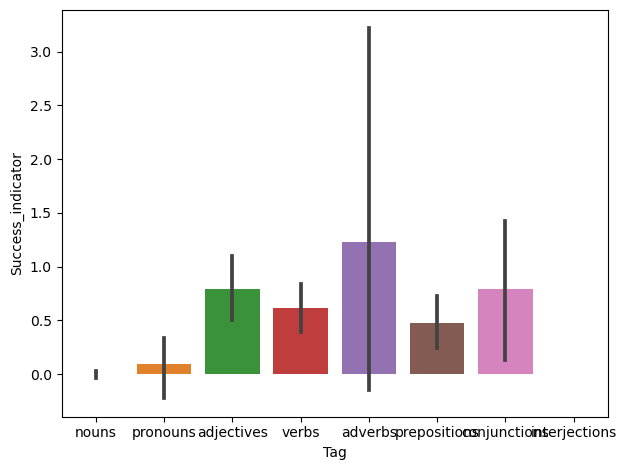

In [18]:
sns.barplot(x='Tag',y='Success_indicator',data=data_Tags)

plt.tight_layout()

There is a strong success indicator for films containing adjectives, adverbs and conjunctions. However, films with nouns seem to have a null success indicator which seems strange. It would be interesting to 1) look at the success indicator values for nouns and 2) to look at the number of films in each categories to see if comparing the error bars is relevant or not.

2623 total values and 
2349 non NaN values


(array([  29.,  206., 1317.,  767.,  115.,   32.,   10.,    3.,    3.,
           4.]),
 array([-2.52270536, -1.64148765, -0.76026994,  0.12094777,  1.00216549,
         1.8833832 ,  2.76460091,  3.64581863,  4.52703634,  5.40825405,
         6.28947176]),
 <BarContainer object of 10 artists>)

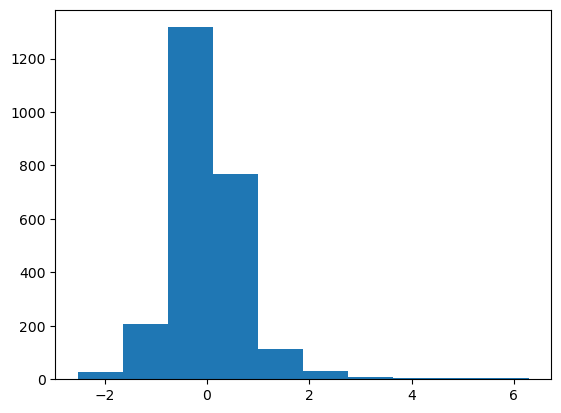

In [19]:
print(len(titles_nouns), 'total values and ')
print(len(titles_nouns.dropna()), 'non NaN values')
plt.hist(titles_nouns.Success_indicator)

So it's not an artefact of the data, nouns in the title do not influence the success of the movie.

In [20]:
print(len(titles_nouns),len(titles_pronouns),len(titles_adjectives),len(titles_verbs),len(titles_adverbs),len(titles_prepositions),len(titles_conjunctions),len(titles_interjections))

2623 239 525 632 187 834 217 4


Adverbs and conjunctions have less datapoints, which explains the high variablility between the datapoints, hence the large standart deviation. Due to the very small number of interjection detected (4), we can decide to dismiss this parameter.

### Graph NER : proper nouns (characters, dates, location)


In [21]:
# Titles containing the main characters name

In [22]:
ner = {'ORGANIZATION': [], 'PERSON': [],'LOCATION':[],
          'DATE':[],'TIME':[],'MONEY':[], 'PERCENT':[],
          'FACILITY':[],'GPE':[]}


ner_df=pd.DataFrame(data=ner)

ner_df.head()

,ORGANIZATION,PERSON,LOCATION,DATE,TIME,MONEY,PERCENT,FACILITY,GPE


In [23]:
for i in range (0,len(movies)):
    
    NER=[0,0,0,0,0,0,0,0,0]

    # load title
    title=movies['Movie_name'].iloc[i]
    
    # cut into individual words
    title_list=word_tokenize(title)
    
    # tagging NER
    ne_tree = nltk.ne_chunk(nltk.pos_tag(title_list))

    # Access named entities and their labels

    ne_label=[]
    for subtree in ne_tree:
        if isinstance(subtree, nltk.Tree):  # Check if the subtree is a named entity
            #print('coucou')
            ne_label.append(subtree.label())
            
    for type in ne_label:
        if type=='ORGANIZATION':
            NER[0]+=1
        elif type=='PERSON':
            NER[1]+=1
        elif type=='LOCATION':
            NER[2]+=1
        elif type=='DATE':
            NER[3]+=1
        elif type=='TIME':
            NER[4]+=1
        elif type=='MONEY':
            NER[5]+=1
        elif type=='PERCENT':
            NER[6]+=1
        elif type=='FACILITY':
            NER[7]+=1
        elif type=='GPE':
            NER[8]+=1
        else:
            print("caramba!")

    ner_df.loc[i]=NER
    


caramba!
caramba!
caramba!
caramba!
caramba!
caramba!
caramba!


In [24]:
movies = pd.concat([movies, ner_df], axis=1)
movies.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Box_office_adjusted,...,Interjections,ORGANIZATION,PERSON,LOCATION,DATE,TIME,MONEY,PERCENT,FACILITY,GPE
0,0,3217,/m/014hr,Army of Darkness,1992,21502796.0,81.0,['United States of America'],horror,3.518918e+07,...,0,2,0,0,0,0,0,0,0,0
1,1,3947,/m/0191n,Blue Velvet,1986,8551228.0,120.0,['United States of America'],thriller,1.791389e+07,...,0,1,1,0,0,0,0,0,0,0
2,2,4231,/m/01cbx,Buffy the Vampire Slayer,1992,16624456.0,86.0,['United States of America'],action,2.720581e+07,...,0,1,0,0,0,0,0,0,0,0
3,3,4728,/m/01hq1,Batman Returns,1992,266822354.0,126.0,"['United States of America', 'United Kingdom']",thriller,4.366530e+08,...,0,1,1,0,0,0,0,0,0,0
4,4,5224,/m/01lsl,Citizen Kane,1941,1585634.0,119.0,['United States of America'],thriller,2.476609e+07,...,0,1,1,0,0,0,0,0,0,0


In [25]:
# graph

titles_person=movies[movies.PERSON!=0]
titles_organization=movies[movies.ORGANIZATION!=0]
titles_location=movies[movies.LOCATION!=0]
titles_date=movies[movies.DATE!=0]
titles_time=movies[movies.TIME!=0]
titles_money=movies[movies.MONEY!=0]
titles_percent=movies[movies.PERCENT!=0]
titles_facility=movies[movies.FACILITY!=0]
titles_gpe=movies[movies.GPE!=0]


print(len(titles_person),len(titles_organization),len(titles_location),len(titles_date),len(titles_time))


704 877 6 0 0


Since only the PERSON and ORGANIZATION types are well represented, we will only keep those ones to look at the success.

In [26]:
titles_rest=movies[movies.PERSON==0][movies.ORGANIZATION==0]
len(titles_rest)

/var/folders/g3/cmtrqyyx2g31_0nljjqrcp800000gn/T/ipykernel_70143/2666447765.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  titles_rest=movies[movies.PERSON==0][movies.ORGANIZATION==0]


1306

/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='ORGANIZATION', ylabel='Success_indicator'>

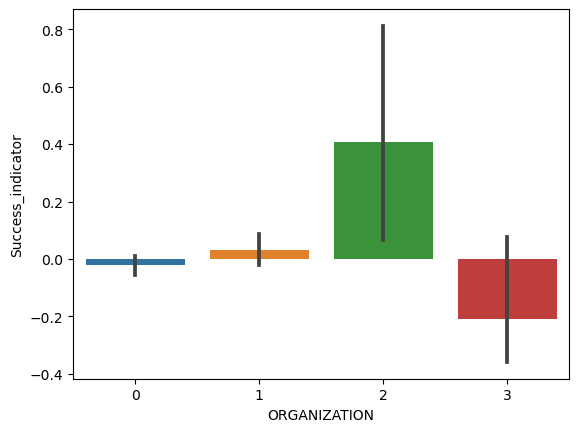

In [27]:
sns.barplot(data=movies,x='ORGANIZATION',y='Success_indicator')

/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

<AxesSubplot:xlabel='PERSON', ylabel='Success_indicator'>

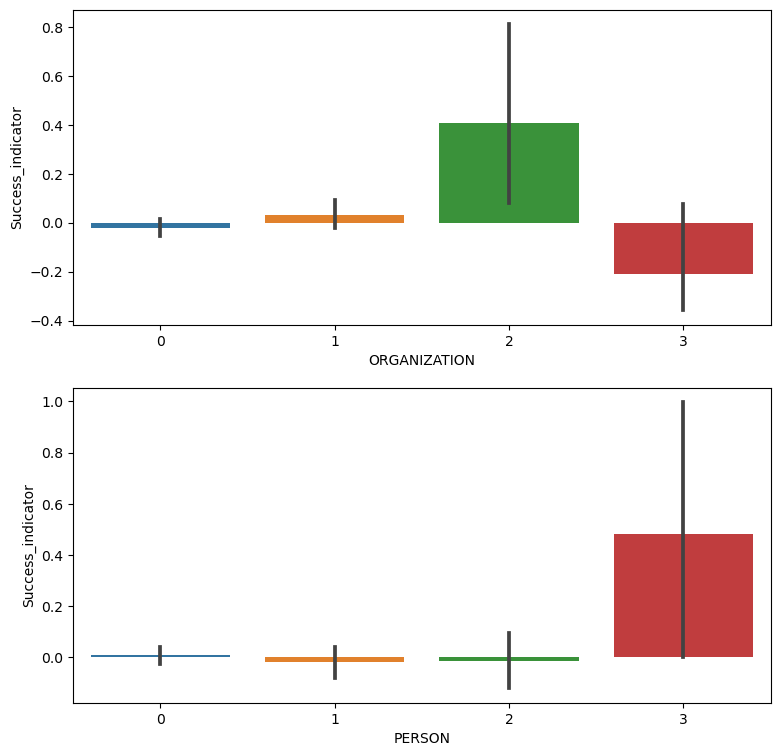

In [28]:
fig,(ax1,ax2)=plt.subplots(2,figsize=(9,9))

sns.barplot(data=movies,x='ORGANIZATION',y='Success_indicator',ax=ax1)
sns.barplot(data=movies,x='PERSON',y='Success_indicator',ax=ax2)

Instead of looking at the number of occurences of person or organization type, we can decide to compare movie titles with at least one person or one organization type. If the title contains both types, it will be considered in both categories.

In [29]:
titles_ORG=pd.concat([titles_organization['Success_indicator'],pd.Series(['ORGANIZATION' for i in range(0,len(titles_organization))])],axis=1)
titles_PER=pd.concat([titles_person['Success_indicator'],pd.Series(['PERSON' for i in range(0,len(titles_person))])],axis=1)
titles_REST=pd.concat([titles_person['Success_indicator'],pd.Series(['-' for i in range(0,len(titles_rest))])],axis=1)

data_NER=pd.concat([titles_ORG,titles_PER,titles_REST],axis=0)
data_NER=data_NER.rename(columns={"Success_indicator": "Success_indicator", 0: "NER"})



/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


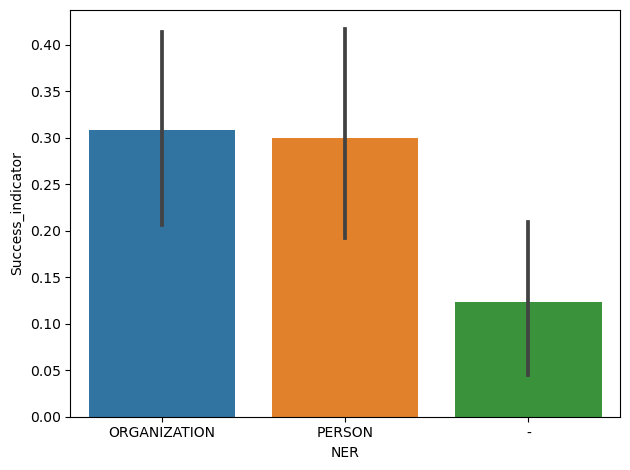

In [30]:
sns.barplot(x='NER',y='Success_indicator',data=data_NER)

plt.tight_layout()

According to this plot, having a named organization or person in the movie title influences the success of the movie (almost x3). We don't see much difference between the organization and the person type. 

We can also look at whether the presence of the character's name in the title influences the movie success.

In [31]:
movies.Character_in_title

0       False
1       False
2       False
3       False
4       False
        ...  
2625    False
2626      NaN
2627    False
2628    False
2629    False
Name: Character_in_title, Length: 2630, dtype: object

/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='Character_in_title', ylabel='Success_indicator'>

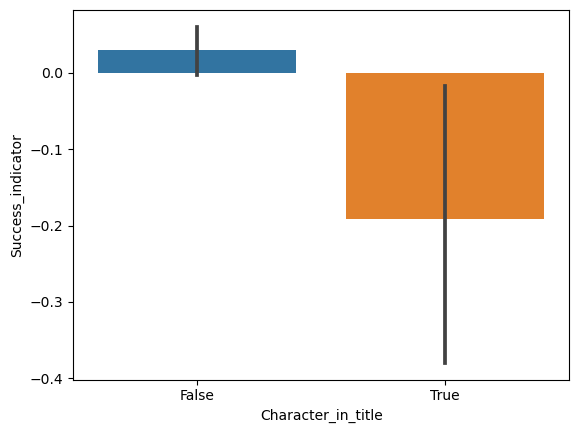

In [32]:
sns.barplot(data=movies,x='Character_in_title',y='Success_indicator')

### Graph sentiment analysis 


In [33]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [34]:
sia = SentimentIntensityAnalyzer()
L_pos=[]
L_neg=[]


for i in range(len(movies)):
    movie_name = movies.iloc[i].Movie_name
    scores = sia.polarity_scores(movie_name)
    L_pos.append(scores["pos"])
    L_neg.append(scores["neg"])


movies['pos_sentiment']=L_pos
movies['neg_sentiment']=L_neg

movies.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Box_office_adjusted,...,PERSON,LOCATION,DATE,TIME,MONEY,PERCENT,FACILITY,GPE,pos_sentiment,neg_sentiment
0,0,3217,/m/014hr,Army of Darkness,1992,21502796.0,81.0,['United States of America'],horror,3.518918e+07,...,0,0,0,0,0,0,0,0,0.0,0.5
1,1,3947,/m/0191n,Blue Velvet,1986,8551228.0,120.0,['United States of America'],thriller,1.791389e+07,...,1,0,0,0,0,0,0,0,0.0,0.0
2,2,4231,/m/01cbx,Buffy the Vampire Slayer,1992,16624456.0,86.0,['United States of America'],action,2.720581e+07,...,0,0,0,0,0,0,0,0,0.0,0.0
3,3,4728,/m/01hq1,Batman Returns,1992,266822354.0,126.0,"['United States of America', 'United Kingdom']",thriller,4.366530e+08,...,1,0,0,0,0,0,0,0,0.0,0.0
4,4,5224,/m/01lsl,Citizen Kane,1941,1585634.0,119.0,['United States of America'],thriller,2.476609e+07,...,1,0,0,0,0,0,0,0,0.0,0.0


/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

Text(0.5, 0.98, 'Join distributions of Success & Positive sentiment of title')

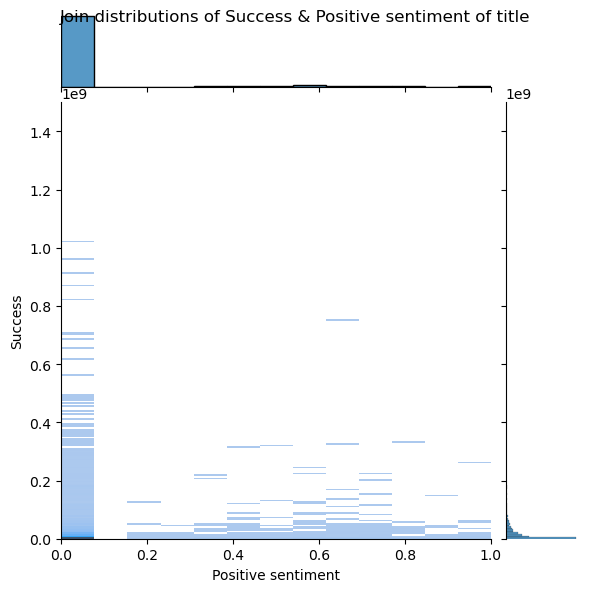

In [35]:
# Plot the join distributions of success indicator & positive sentiment of the title

jplot = sns.jointplot(x='pos_sentiment', y='Movie_box_office_revenue', data=movies, kind='hist',xlim=(0,1),ylim=(0,1500000000))

plt.xlabel('Positive sentiment')
plt.ylabel('Success') # TO CHANGE WITH FINAL DATAFRAME
jplot.fig.suptitle('Join distributions of Success & Positive sentiment of title')

/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

Text(0.5, 0.98, 'Join distributions of Success & Negative sentiment of title')

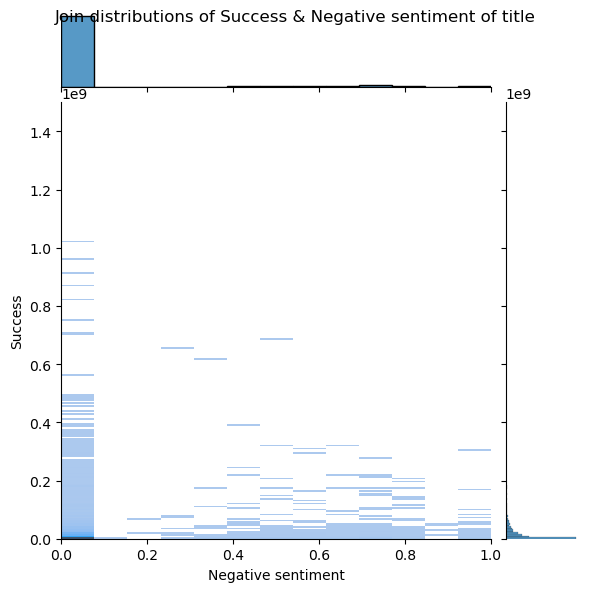

In [36]:
# Plot the join distributions of success indicator & negative sentiment of the title

jplot = sns.jointplot(x='neg_sentiment', y='Movie_box_office_revenue', data=movies, kind='hist',xlim=(0,1),ylim=(0,1500000000))

plt.xlabel('Negative sentiment')
plt.ylabel('Success') # TO CHANGE WITH FINAL DATAFRAME
jplot.fig.suptitle('Join distributions of Success & Negative sentiment of title')

/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Clarisse/anaconda3/envs/ada/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

<AxesSubplot:xlabel='neg_sentiment', ylabel='Success_indicator'>

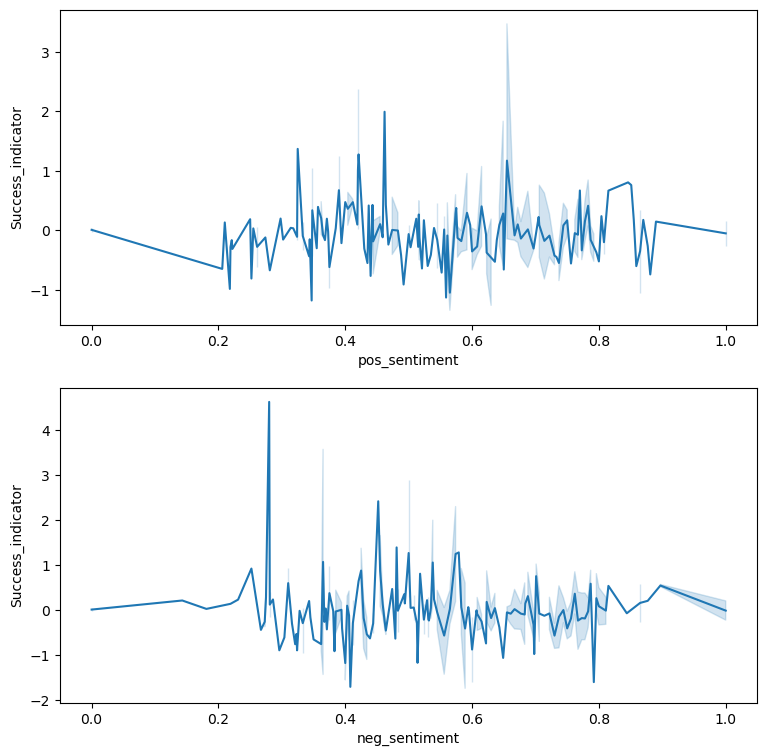

In [37]:
fig,(ax1,ax2)=plt.subplots(2,figsize=(9,9))

sns.lineplot(data=movies,x='pos_sentiment',y='Success_indicator',ax=ax1)
sns.lineplot(data=movies,x='neg_sentiment',y='Success_indicator',ax=ax2)

# try linear regression and see if significant

### Graph document classification or topic detection

In [31]:
action_movie_lexical_field = [
    "Explosive", "Thrilling", "Intense", "Adrenaline", "Stunts",
    "Chase", "Gunfights", "Fight Sequences", "Heroic", "Showdown",
    "Combat", "Escape", "Danger", "High-octane", "Vigilante",
    "Rescue", "Martial Arts", "Suspense", "Explosions", "Tension",
    "Firepower", "Cinematic", "Gritty", "Mission", "Confrontation",
    "Underworld", "Spectacle", "Pursuit", "Tactical", "Revenge",
    "Covert Operations", "Fast-paced", "Adversary", "Urban Warfare",
    "Daring", "Climactic", "Blitzkrieg", "Onslaught", "Skirmish",
    "Vendetta", "Mayhem", "Assault", "Battle", "Clash",
    "Carnage", "Havoc", "Melee", "Rampage", "Battlefront",
    "Ambush", "Siege", "Duel", "Conflict", "Strife",
    "Renegade", "Bravery", "Insurgent", "Fugitive", "Fierce",
    "Bulletstorm", "Demolition", "Sniper", "Crisis", "Tough-as-nails",
    "Hand-to-hand Combat", "Struggle", "Infiltration", "Strategic", "Dynamic",
    "Prowess", "Conspirator", "Flashpoint", "Perseverance", "Sudden",
    "Stealth", "Commando", "Espionage", "Precision", "Vanguard",
    "Reckless", "Hostile", "Combatant", "Intrepid", "Tumult",
    "Audacity", "Escapade", "Surging", "Raucous", "Paragon",
    "Impetus", "Onrush", "Frenetic", "Stalwart", "Incursion",
    "Ruckus", "Zeal", "Vortex", "Upheaval", "Bedlam", "Strain"
]
action_movie_lexical_field = list(set(action_movie_lexical_field))

adventure_movie_lexical_field = [
    "Epic", "Journey", "Quest", "Exploration", "Discovery",
    "Expedition", "Thrilling", "Adventurous", "Quest", "Odyssey",
    "Discovery", "Exploration", "Exhilarating", "Perilous", "Legendary",
    "Daring", "Heroic", "Escapade", "Venture", "Exotic",
    "Discovery", "Challenges", "High-stakes", "Uncharted", "Exploits",
    "Action-packed", "Enigmatic", "Mysterious", "Pioneering", "Unexplored",
    "Unknown", "Explorers", "Voyage", "Daring", "Risks",
    "Questing", "Adrenaline", "Landscapes", "Vast", "Untamed",
    "Wilderness", "Jungle", "Mountainous", "Desert", "Seafaring",
    "Nautical", "High-seas", "Cinematic", "Immersive", "Enthralling",
    "Suspenseful", "Discovery", "Epic-scale", "Monumental", "Undiscovered",
    "Wonder", "Panoramic", "Breathtaking", "Journey", "Escapades",
    "Exploratory", "Unknown", "Uncharted", "Excursion", "High-adventure",
    "Traverse", "Bold", "Questing", "Intriguing", "Trailblazing",
    "Unfolding", "Unraveling", "Mythical", "Enchanted", "Unearth",
    "Quixotic", "Stirring", "Vivid", "Expeditionary", "Bold",
    "Voyaging", "Peril", "Quester", "Forefront", "Endeavor",
    "Pioneering", "Enterprising", "Questing", "Safari", "Epic",
    "Legendary", "Voyager", "Discovery", "Odyssey", "Mythical",
    "Fabled", "Ethereal", "Intrigue", "Vista", "Daring",
    "Fascination", "Enigma", "Intricacy", "Marvel", "Prowess",
    "Pioneer", "Risk-taker", "Challenge", "Adventure-seeker", "Discovery"
]
adventure_movie_lexical_field= list(set(adventure_movie_lexical_field))

art_movie_lexical_field = [
    "Harmony", "Melody", "Symphony", "Concert", "Performance",
    "Masterpiece", "Gallery", "Exhibition", "Artistic", "Creative",
    "Expression", "Innovation", "Aesthetics", "Imagery", "Composition",
    "Rhythm", "Dance", "Ballet", "Opera", "Theatrical",
    "Literature", "Novel", "Poetry", "Prose", "Fiction",
    "Nonfiction", "Verse", "Song", "Lyric", "Genre",
    "Plot", "Character", "Setting", "Narration", "Theme",
    "Tone", "Style", "Classic", "Modern", "Avant-garde",
    "Impressionism", "Surrealism", "Realism", "Abstract", "Expressionism",
    "Symbolism", "Diction", "Sonnet", "Haiku", "Narrative",
    "Symbol", "Allegory", "Dialogue", "Monologue", "Soliloquy",
    "Metaphor", "Simile", "Alliteration", "Personification", "Hyperbole",
    "Irony", "Paradox", "Satire", "Comedy", "Tragedy",
    "Drama", "Performance", "Entertainment", "Spectacle", "Stagecraft",
    "Visuals", "Inspirational", "Collaboration", "Experimentation", "Fusion",
    "Interpretation", "Medium", "Creative", "Author", "Composer",
    "Lyricist", "Choreographer", "Imaginative", "Inspiration", "Enchantment",
    "Intrigue", "Elegance", "Visionary", "Expressive", "Poignant",
    "Evocative", "Captivating", "Resonance", "Emotion", "Atmosphere",
    "Innovative", "Immersive", "Imagination", "Muse", "Compelling",
    "Reflective", "Thought-provoking", "Sensual", "Ethereal", "Timeless"
]
art_movie_lexical_field = list(set(art_movie_lexical_field))

comedy_movie_lexical_field = [
    "Humor", "Laughter", "Comedy", "Hilarious", "Wit",
    "Satire", "Farce", "Spoof", "Parody", "Slapstick",
    "Zany", "Jovial", "Whimsical", "Amusing", "Lighthearted",
    "Witty", "Joke", "Gag", "Chuckle", "Jest",
    "Prank", "Whoopee", "Mischief", "Mirth", "Jest",
    "Quip", "Banter", "Wisecrack", "Irony", "Sarcasm",
    "Puns", "Joviality", "Hilarity", "Comical", "Jocular",
    "Playful", "Jesting", "Fun", "Rib-tickling", "Guffaw",
    "Laughable", "Silly", "Absurd", "Ridiculous", "Eccentric",
    "Quirky", "Eccentricity", "Droll", "Buffoonery", "Antics",
    "Clumsy", "Irreverent", "Giggles", "Merriment", "Jollity",
    "Drollery", "Hilarity", "Grotesque", "Waggish", "Buffoonish",
    "Hijinks", "Foolery", "Ludicrous", "Giggly", "Jesting",
    "Jocund", "Silly", "Ridicule", "Silliness", "Gaiety",
    "Jolly", "Gleeful", "Frolicsome", "Joyful", "Laughing",
    "Giggling", "Cheerful", "Happy", "Merry", "Mirthful",
    "Amused", "Whimsy", "Entertaining", "Playfulness", "Hysterical",
    "Jestful", "Waggishness", "Teasing", "Facetious", "Light-hearted",
    "Chuckler", "Giggler", "Hilarity", "Drollness", "Joking",
    "Gag-filled", "Whimsy", "Amusement", "Jestfulness", "Chuckler",
    "Giggler", "Merriment", "Mirthfulness", "Jestfulness", "Jokiness",
    "Humerous", "Whimsicality", "Playful", "Farcical", "Jocose",
    "Witty", "Irreverent", "Ridiculous", "Ludicrousness", "Waggishness"
]
comedy_movie_lexical_field = list(set(comedy_movie_lexical_field))


drama_movie_lexical_field = [
    "Tragedy", "Conflict", "Emotional", "Relationships", "Struggle",
    "Heartbreak", "Loss", "Tension", "Sacrifice", "Resilience",
    "Triumph", "Betrayal", "Redemption", "Intense", "Character",
    "Strife", "Profound", "Raw", "Impactful", "Cinematic",
    "Journey", "Crisis", "Confrontation", "Moving", "Compelling",
    "Powerful", "Challenge", "Resolution", "Inspiration", "Captivating",
    "Human condition", "Poignant", "Inner conflict", "Dynamics", "Growth",
    "Realism", "Decision", "Reflection", "Ambition", "Desperation",
    "Emotion", "Multidimensional", "Inner turmoil", "Relationship", "Gripping",
    "Soul-stirring", "Unresolved", "Beauty", "Ambiguous", "Unflinching",
    "Introspection", "Life-changing", "Dilemma", "Moral", "Identity",
    "Self-discovery", "Suffering", "Empathy", "Striving", "Ambition",
    "Desperation", "Drama", "Pivotal", "Twists", "Vivid",
    "Depiction", "Immersion", "Affecting", "Exploration", "Sensational",
    "Tragic", "Mysterious", "Dramatic", "Poignant", "Unpredictable",
    "Resonant", "Complicated", "Stunning", "Cinematic", "Masterclass",
    "Human", "Emotionally", "Evocative", "Character", "Raw",
    "Authenticity", "Genuine", "Experiences", "Turbulent", "Searing",
    "Thoughtful", "Brilliance", "Intimate", "Gripping", "Masterclass",
    "Impactful", "Storytelling", "Nuanced", "Potent", "Stirring",
    "Unsettling", "Harsh", "Atmosphere", "Challenging", "Pensive",
    "Soul-searching", "Cinematography", "Exploration", "Realism", "Compelling",
    "Human", "Emotionally", "Turbulent", "Searing", "Impactful",
    "Captivating", "Stunning", "Gripping", "Intricate", "Unpredictable",
    "Soul-stirring", "Emotional", "Resonance", "Complex", "Affecting",
    "Journey", "Character", "Depth", "Cinematic", "Excellence",
    "Awe-inspiring", "Performances", "Compelling", "Dynamics", "Resonant",
    "Gut-wrenching", "Transcendent", "Experience", "Impactful", "Development",
    "Harsh", "Realities", "Ambiguous", "Resolutions", "Soul-searching",
    "Impactful", "Cinematography", "Exploration", "Realism", "Compelling",
    "Human", "Emotionally", "Turbulent", "Searing", "Impactful"
]
drama_movie_lexical_field = list(set(drama_movie_lexical_field))


opinion_political_movie_lexical_field = [
    "Political", "Opinion", "Government", "Power", "Ideology",
    "Activism", "Controversy", "Policy", "Election", "Social",
    "Injustice", "Advocacy", "Leadership", "Corruption", "Debate",
    "Perspective", "Partisanship", "Revolution", "Democracy", "Authoritarianism",
    "Crisis", "Protest", "Civil Liberties", "Public Policy", "Political Drama",
    "Governmental", "Political System", "Reform", "Oppression", "Voices",
    "Resistance", "Diplomacy", "Authority", "Thriller", "Public Opinion",
    "Policy-making", "Climate", "Advocacy", "Propaganda", "Conflict",
    "Allegory", "Corruption", "Movement", "Unrest", "Satire",
    "Activism", "Civil Rights", "Campaign", "Revolution", "Upheaval",
    "Intrigue", "Dissent", "Political Landscape", "Rivalry", "Strategy",
    "Divide", "Decision", "Discontent", "Theater", "Vision",
    "Standoff", "Philosophy", "Insight", "Legacy", "Ethics",
    "Protest", "Critique", "Visionary", "Revolution", "Debate",
    "Dissent", "Thriller", "Strategy", "Protest", "Commentary",
    "Movement", "Revolution", "Upheaval", "Dissent", "Allegory"
]

opinion_political_movie_lexical_field = list(set(opinion_political_movie_lexical_field))

family_friendly_movie_lexical_field = [
    "Adventure", "Fantasy", "Animation", "Family", "Children",
    "Comedy", "Magic", "Friendship", "Wholesome", "Enchanting",
    "Imagination", "Joyful", "Heartwarming", "Animated", "Cartoon",
    "Lighthearted", "Cheerful", "Innocent", "Charming", "Magical",
    "Playful", "Adorable", "Fantasy", "Wonder", "Childhood",
    "Fun", "Entertaining", "Moral", "Colorful", "Laugh",
    "Smile", "Happiness", "Immersive", "Inspiring", "Imaginative",
    "Cute", "Sweet", "Heroic", "Dreamy", "Optimistic",
    "Vibrant", "Whimsical", "Fairy tale", "Excitement", "Inclusive",
    "Heartfelt", "Chuckle", "Feel-good", "Positive", "Caring",
    "Uplifting", "Journey", "Bravery", "Wonderment", "Epic",
    "Spectacle", "Gentle", "Fable", "Clever", "Imaginary",
    "Fanciful", "Cartoonish", "Creative", "Silly", "Fantasy",
    "Adventure", "Humorous", "Wholesome", "Storytelling", "Lively",
    "Innocence", "Values", "Realm", "Kid-friendly", "Adventurous",
    "Wonder-filled", "Animation", "Feature", "Entertaining", "Charm",
    "Moments", "Giggle", "Bright", "Creativity", "Whimsy",
    "Landscape", "Feel-good", "Magic", "Cinematic magic", "Entertainment",
    "Characters", "Fantasy journey"
]
family_friendly_movie_lexical_field = list(set(family_friendly_movie_lexical_field))


fiction_movie_lexical_field = [
    "Science", "Fiction", "Fairy", "Tale", "Fictional",
    "Film", "Medical", "Mythological", "Fantasy", "Sci-Fi",
    "Sword", "Sorcery", "Time", "Travel", "Supernatural",
    "Alien", "Invasion", "Zombie", "Fantasy", "Disaster",
    "Fan", "Film", "Adventure", "Imagination", "Otherworldly",
    "Alternate", "Reality", "Extraterrestrial", "Futuristic", "Speculative",
    "Time-bending", "Magic", "Enchanting", "Epic", "Mythical",
    "Surreal", "Unreal", "Dreamlike", "Mystical", "Paranormal",
    "Magical", "Realism", "Timeless", "Enigmatic", "Fantastical",
    "Supernatural", "Alien", "Worlds", "Parallel", "Universes",
    "Dystopian", "Utopian", "Space", "Exploration", "Interstellar",
    "Time", "Warp", "Parallel", "Realities", "Sorcery",
    "Conjuring", "Mythical", "Beings", "Fable", "Fanciful",
    "Unearthly", "Time", "Paradox", "Extraterrestrial", "Life",
    "Temporal", "Distortion", "Reality-bending", "Immersive", "Unconventional",
    "Astrological", "Galactic", "Time", "Conundrum", "Magical",
    "Creatures", "Parallel", "Dimensions", "Mind-bending", "Ethereal",
    "Phantasmagorical", "Alien", "Abduction", "Time", "Manipulation",
    "Enchanted", "Extraterrestrial", "Visitors", "Spectral", "Mystifying",
    "Astounding", "Phenomenal", "Dimensional", "Travel", "Parallel",
    "Existence", "Cosmic", "Mythopoeic", "Astrophysical", "Enigmatic",
    "Narratives", "Zombified", "Fantasy", "Realms", "Apocalyptic",
    "Time", "Anomaly", "Futuristic", "Technology", "Timeless",
    "Tale", "Unearthly", "Adventures", "Supernatural", "Wonders",
    "Time", "Capsule", "Time", "Dilation", "Alternate",
    "Dimensions", "Timeless", "Wonder", "Galactic", "Explorations",
    "Fanciful", "Journeys", "Sorcerous", "Mythopoeic", "Worlds",
    "Fantastical", "Realities", "Magical", "Adventures", "Time",
    "Loop", "Astrological", "Marvels", "Epic", "Quests",
    "Interdimensional", "Ethereal", "Beauty", "Timeless", "Classic",
    "Astrophysical", "Marvels", "Mythical", "Creatures", "Fantasy",
    "Worlds", "Timeless", "Fantasy", "Cosmic", "Adventures",
    "Imaginary", "Realms", "Galactic", "Quests", "Otherworldly",
    "Phenomena", "Temporal", "Conundrum", "Supernatural", "Beings"
]
fiction_movie_lexical_field = list(set(fiction_movie_lexical_field))


historical_movie_lexical_field = [
    "Short", "Film", "Historical", "Fiction", "Period",
    "Piece", "History", "Biographical", "British", "Empire",
    "Epic", "Cold", "War", "Documentaries", "Biography",
    "Biopic", "Feature", "Netherlands", "World", "II",
    "Gulf", "Movies", "Gladiators", "Drama", "Sponsored",
    "Ancient", "Civilization", "Medieval", "Renaissance", "Revolution",
    "Monarchy", "Colonial", "Exploration", "Discovery", "Warfare",
    "Conflict", "Cultural", "Heritage", "Time", "Era",
    "Costume", "Setting", "Political", "Social", "Cultural",
    "Ceremony", "Tradition", "Ruler", "Empire", "Kingdom",
    "Regime", "Revolt", "Uprising", "Resistance", "Struggle",
    "Conquest", "Dynasty", "Invasion", "Siege", "Alliance",
    "Peasant", "Noble", "Rural", "Urban", "Economy",
    "Trade", "Customs", "Beliefs", "Religion", "Faith",
    "Persecution", "Treaty", "Diplomacy", "Betrayal", "Alliance",
    "Power", "Strife", "Reform", "Change", "Legacy",
    "Artifact", "Archaeology", "Heritage", "Descendants", "Ancestry",
    "Journey", "Exploration", "Trade", "Discovery", "Frontier",
    "Settlement", "Expedition", "Discoverer", "Navigator", "Explorer",
    "Historian", "Chronicler", "Narrative", "Recreation", "Representation"
]
historical_movie_lexical_field = list(set(historical_movie_lexical_field))


horror_movie_lexical_field = [
    "Horror", "Movies", "Natural", "Film", "Sci-fi",
    "Road", "Creature", "Monster", "Slasher", "Thriller",
    "Suspense", "Supernatural", "Paranormal", "Terror", "Fright",
    "Spooky", "Eerie", "Chiller", "Scream", "Nightmare",
    "Dread", "Macabre", "Creepy", "Gory", "Gothic",
    "Dark", "Sinister", "Fear", "Shiver", "Blood-curdling",
    "Bone-chilling", "Hair-raising", "Spine-tingling", "Creepiness", "Startle",
    "Menace", "Apparition", "Phantom", "Wraith", "Specter",
    "Haunting", "Nightmarish", "Freaky", "Unsettling", "Otherworldly",
    "Ghastly", "Frightening", "Eerie", "Ghostly", "Apprehension",
    "Dismay", "Dreadful", "Horrendous", "Horrifying", "Monstrous",
    "Abominable", "Terrifying", "Chilling", "Gruesome", "Repulsive",
    "Ghoul", "Zombie", "Witch", "Vampire", "Werewolf",
    "Demon", "Satanic", "Possession", "Haunted", "Cursed",
    "Malevolent", "Macabre", "Supernatural", "Occult", "Occurrence",
    "Bizarre", "Freakish", "Strange", "Unnatural", "Aberration",
    "Anomaly", "Devilish", "Sinister", "Eldritch", "Fearful",
    "Bloodthirsty", "Deadly", "Fatal", "Grisly", "Grim",
    "Harrowing", "Infernal", "Deathly", "Sinister", "Unholy",
    "Wicked", "Eerie", "Spooky", "Unearthly", "Cemetery",
    "Cryptic", "Ominous", "Petrifying", "Demonic", "Macabre",
    "Mysterious", "Sinister", "Chaos", "Nightfall", "Midnight",
    "Darkness", "Malevolence", "Coven", "Dystopian", "Post-apocalyptic"
]
horror_movie_lexical_field = list(set(horror_movie_lexical_field))


romance_movie_lexical_field = [
    "Romance", "Love", "Passion", "Affection", "Relationship",
    "Heartfelt", "Emotional", "Intimate", "Connection", "Chemistry",
    "Tenderness", "Devotion", "Adoration", "Commitment", "Sentimental",
    "Soulmate", "Desire", "Closeness", "Warmth", "Couples",
    "Heartwarming", "Amorous", "Flirtation", "Courtship", "Endearment",
    "Yearning", "Fondness", "Infatuation", "Serenade", "Lovers",
    "Sweetheart", "Enchantment", "Passionate", "Happiness", "Eternal",
    "Joyful", "Gentle", "Charming", "Sweeping", "Embrace",
    "Whisper", "Breathtaking", "Enamored", "Candlelit", "Romanticism",
    "Cherish", "Connection", "Blissful", "Tender", "Hearts",
    "Lovebird", "Intimacy", "Sentiment", "Swoon", "Elope",
    "Captivating", "Admiration", "Dreamy", "Amour", "Fairy-tale",
    "Honeymoon", "Passionate", "Heartfelt", "Sensual", "Kiss",
    "Dreamy", "Poetic", "Seductive", "Flame", "Lust",
    "Intrigue", "Dreamlike", "Enchanted", "Cinema", "Wooing",
    "Dazzling", "Luminous", "Ephemeral", "Quixotic", "Serendipity",
    "Bliss", "Butterflies", "Giddy", "Infinite", "Adorned",
    "Infatuation", "Charm", "Sincerity", "Gaze", "Whirlwind",
    "Beloved", "Hug", "Giddy", "Infinite", "Amaze",
    "Rendezvous", "Rapture", "Magnetic", "Velvet", "Adorned",
    "Yearn", "Eternal", "Cuddle", "Swept", "Wistful"
]

romance_movie_lexical_field = list(set(romance_movie_lexical_field))

sports_movie_lexical_field = [
    "Sports", "Athletics", "Competition", "Team", "Victory",
    "Champion", "Challenge", "Adversity", "Triumph", "Defeat",
    "Determination", "Training", "Strive", "Achievement", "Rivalry",
    "Mentor", "Underdog", "Inspiration", "Dedication", "Grit",
    "Courage", "Glory", "Conquer", "Passion", "Commitment",
    "Game", "Athlete", "Intensity", "Drive", "Perseverance",
    "Goal", "Win", "Loss", "Struggle", "Motivation",
    "Teamwork", "Spirit", "Endurance", "Sporting", "Event",
    "Stamina", "Challenge", "Vigorous", "Discipline", "Victorious",
    "Courageous", "Thrilling", "Inspire", "Passionate", "Courage",
    "Sweat", "Heart", "Drama", "Intensity", "Achieve",
    "Skill", "Training", "Competitive", "Grit", "Challenge",
    "Determination", "Inspiring", "Athleticism", "Endeavor", "Perseverance",
    "Hardship", "Conquest", "Prowess", "Rival", "Tribulation",
    "Camaraderie", "Adrenaline", "Gladiatorial", "Confrontation", "Striving",
    "Tenacity", "Spectacle", "Showdown", "Pinnacle", "Courage",
    "Gutsy", "Strategic", "Stalwart", "Steadfast", "Tenacious",
    "Valiant", "Resilient", "Unyielding", "Indomitable", "Fierce",
    "Adversarial", "Overcome", "Aspiration", "Clash", "Match",
    "Exertion", "Physicality", "Rigorous", "Pursuit", "Ambition",
    "Resolve", "Test", "Contest", "Journey", "Conqueror"
]

sports_movie_lexical_field = list(set(sports_movie_lexical_field))


thriller_movie_lexical_field = [
    "Thriller", "Suspense", "Mystery", "Tension", "Intensity",
    "Plot", "Drama", "Action", "Intrigue", "Crisis",
    "Conspiracy", "Enigma", "Cliffhanger", "Unexpected", "Adrenaline",
    "Chase", "Danger", "Sudden", "Panic", "Foreboding",
    "Gripping", "Eerie", "Menacing", "Cryptic", "Unsettling",
    "Cinematic", "Riddle", "Puzzling", "Mind-bending", "Nail-biting",
    "Sinister", "Chilling", "Dark", "Compelling", "Mysterious",
    "Suspicious", "Twist", "Turn", "Puzzle", "Psychological",
    "Dread", "Anxiety", "Mistrust", "Paranoia", "Obscure",
    "Cunning", "Surprise", "Sneak", "Taut", "Concealed",
    "Fear", "Prowl", "Heart-pounding", "Enigmatic", "Cryptic",
    "Doubt", "Apprehension", "Maze", "Risky", "Revelation",
    "Ominous", "Creepy", "Peril", "Obsession", "Hidden",
    "Reckoning", "Menace", "Covert", "Clandestine", "Uncertainty",
    "Prelude", "Unveil", "Unpredictable", "Challenging", "Intricate",
    "Decipher", "Investigate", "Neurotic", "Stalking", "Sleuth",
    "Mistrust", "Enshroud", "Envelop", "Ambiguity", "Sly",
    "Furtive", "Shadowy", "Stealthy", "Provocative", "Piquant",
    "Thrill", "Forewarning", "Uncanny", "Edgy", "Risky",
    "Edgy", "Risk", "Jolt", "Pulse-pounding", "Uncanny",
    "Obscure", "Mysterious", "Secretive", "Unrevealed", "Veiled",
    "Veiled", "Covered", "Masked", "Hidden", "Cloaked"
]
thriller_movie_lexical_field = list(set(thriller_movie_lexical_field))


western_movie_lexical_field = [
    "Western", "Cowboy", "Frontier", "Saloon", "Gunfight",
    "Outlaw", "Sheriff", "Ranch", "Dusty", "Horse",
    "Cattle", "Wagon", "Desert", "Spur", "Saddle",
    "Lasso", "Rodeo", "Wrangler", "Trail", "Vigilante",
    "Bandit", "Posse", "Pioneer", "Gold rush", "Prospector",
    "Marshal", "Duel", "Chase", "Prairie", "Homestead",
    "Stagecoach", "Stampede", "Corral", "Stetson", "Cattle drive",
    "Campfire", "Revolver", "Saloon", "Desperado", "High noon",
    "Shootout", "Gunslinger", "Wasteland", "Chaps", "Frontiersman",
    "Cactus", "Boomtown", "Sarsaparilla", "Bounty", "Wrangle",
    "Dust", "Canyon", "Sunset", "Homesteader", "Grit",
    "Range", "Buckaroo", "Rustler", "Wrangling", "Marshal",
    "Lawman", "Varmint", "Vaquero", "Giddy-up", "Hooves",
    "Bonanza", "Chisholm", "Draw", "Buffalo", "Stallion",
    "Hideout", "Land rush", "Desperado", "Sunrise", "Pecos",
    "Roundup", "Prospect", "Tumbleweed", "Roaming", "Sierra",
    "Homestead", "Cattleman", "Pony", "Nomad", "Sunshine",
    "Leather", "Outlawed", "Drover", "Sunset", "Wanderer",
    "Wrangler", "Wrangle", "Wagon train", "Lone", "Brand",
    "Bounty", "Hoedown", "Buckskin", "Gambler", "Poker",
    "Frontierswoman", "Drovers", "Galloping", "Desperado", "Rifle",
    "Stagecoach", "Gold mine", "Lariat", "Homestead"
]

western_movie_lexical_field = list(set(western_movie_lexical_field))


world_cinema_lexical_field = [
    "Global", "Journey", "Cultural", "Nomad", "Odyssey",
    "Heritage", "Melting Pot", "Harmony", "Bridges", "Voyage",
    "Diversity", "Mosaic", "Parallel", "Discovery", "Tapestry",
    "Unity", "Exploration", "Fusion", "Epic", "Exotic",
    "Quest", "Multicultural", "Synchronicity", "Cinematic", "Panorama",
    "Vista", "Intersection", "Cinéaste", "Nomadic", "Transcendent",
    "Auteur", "Collage", "Mélange", "Inclusive", "Globalization",
    "Spectrum", "Confluence", "Synchrony", "Interwoven", "Metamorphosis",
    "Chorus", "Pan-global", "Interplay", "Mélange", "Juxtapose",
    "Crossover", "Intersection", "Panoramic", "Inclusivity", "Bicultural",
    "Multiregional", "Multinational", "Worldview", "Cinephile", "Polyglot",
    "Peregrination", "Folklore", "Intercultural", "Anthology", "Citizen",
    "Amalgamation", "Pluralistic", "Amalgamation", "Nomadic", "Eclectic",
    "Transnational", "Anthology", "Polyglot", "Cosmopolitan", "Synthesis",
    "Farrago", "Odyssey", "Tapestry", "Diversity", "Cinematic",
    "Epic", "Crossover", "Synchrony", "Cultural", "Melting Pot",
    "Voyage", "Intersection", "Cinéaste", "Transcendent", "Auteur",
    "Collage", "Mélange", "Globalization", "Spectrum", "Confluence",
    "Chorus", "Pan-global", "Interplay", "Juxtapose", "Crossover",
    "Intersection", "Panoramic", "Inclusivity", "Multiregional", "Multinational",
    "Worldview", "Cinephile", "Folklore", "Anthology", "Polyglot"
]

world_cinema_lexical_field = list(set(world_cinema_lexical_field))

war_film_lexical_field = [
    "War", "Conflict", "Battle", "Combat", "Struggle",
    "Soldier", "Warrior", "Troop", "Deployment", "Campaign",
    "Trench", "Frontline", "Barracks", "Armored", "Battleground",
    "Casualty", "Heroism", "Resilience", "Victory", "Defeat",
    "Warfare", "Strategy", "Tactics", "Firepower", "Mobilization",
    "Alliance", "Invasion", "Occupation", "Hostility", "Battlefield",
    "Mission", "Operation", "Strife", "Siege", "Conquest",
    "Ceasefire", "Truce", "Reconnaissance", "Muster", "Nuclear",
    "Destruction", "Conflict zone", "Conscription", "Draft", "Allied",
    "Axis", "Warlord", "Insurgency", "Resistance", "Paratrooper",
    "Guerrilla", "Surrender", "Occupied", "Infiltration", "Shellshock",
    "Armistice", "Militant", "Enlistment", "Crisis", "Retaliation",
    "Rebellion", "Commander", "Martyr", "Peacekeeper", "Holocaust",
    "Infantry", "Cavalry", "Bunker", "Air raid", "Navy",
    "Aerial", "Landmine", "Missile", "Barricade", "Muster",
    "Doctrine", "Rations", "Atrocity", "Civilian", "Collateral",
    "Mobilize", "Veteran", "Paramilitary", "Neutrality", "Deterrence",
    "Warplane", "Nuclear fallout", "Disarmament", "Tragedy", "Genocide",
    "Foreign legion", "Siege", "Rifle", "Artillery", "Outpost",
    "Munitions", "Draft", "Naval", "Deployment", "Landmark",
    "Allied", "Prisoner", "Detainee", "Invasion", "Mobilization",
    "Retreat", "Conquer", "Counterattack", "Insurgency", "Outgunned"
]

war_film_lexical_field = list(set(war_film_lexical_field))


In [17]:
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english")) # we focus on english titles only
import string

punctuation = set(string.punctuation)

In [21]:
# Function to filter stop words
def filter_stop_words(text_list):
    filtered_list = []
    rest=["'s",'``',"''"]
    for word in text_list:
        if word.casefold() not in stop_words and  word.casefold() not in punctuation and word.casefold() not in rest:
                filtered_list.append(word)

    return(filtered_list)

Idea: train the model for each genre to create a list of reccurent words. Priory to creating the final bag of words, get rid of all PERSON (and ORGANIZATION) types.

In [18]:
# Cut the text document as a list of 42,306 movies

with open("Data/plot_summaries.txt", "r", encoding='utf-8') as file:
    content = file.read()

# Split the content into entries based on the tab character
entries = content.split('\n')

# Create a list to store summaries
docs = []
titles=[]

# Iterate through entries and extract summaries
for entry in entries:
    if entry:  # Skip empty lines
        # Split each entry based on the tab character
        parts = entry.split('\t', 1)

        # Check if the entry has at least two parts (ID and summary)
        if len(parts) == 2:
            title, summary = parts
            docs.append(summary)
            titles.append(int(title))

# Print the list of movie summaries
for i, title in enumerate(titles, start=1):
    print(f'Movie {i} summary: {title}\n')

Movie 1 summary: 23890098

Movie 2 summary: 31186339

Movie 3 summary: 20663735

Movie 4 summary: 2231378

Movie 5 summary: 595909

Movie 6 summary: 5272176

Movie 7 summary: 1952976

Movie 8 summary: 24225279

Movie 9 summary: 2462689

Movie 10 summary: 20532852

Movie 11 summary: 15401493

Movie 12 summary: 18188932

Movie 13 summary: 2940516

Movie 14 summary: 1335380

Movie 15 summary: 1480747

Movie 16 summary: 24448645

Movie 17 summary: 15072401

Movie 18 summary: 4018288

Movie 19 summary: 4596602

Movie 20 summary: 15224586

Movie 21 summary: 15585766

Movie 22 summary: 1760737

Movie 23 summary: 29062594

Movie 24 summary: 29326153

Movie 25 summary: 9252321

Movie 26 summary: 8388648

Movie 27 summary: 10644072

Movie 28 summary: 13455076

Movie 29 summary: 33269085

Movie 30 summary: 2254491

Movie 31 summary: 447194

Movie 32 summary: 24165951

Movie 33 summary: 18549958

Movie 34 summary: 12978934

Movie 35 summary: 8471210

Movie 36 summary: 1925869

Movie 37 summary: 10

In [10]:
data_preprocessed=pd.read_csv('Data/movies_preprocessed.csv')
data_preprocessed.head()

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Character_in_title
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['United States of America'],thriller,"['Akooshay', 'Lieutenant Melanie Ballard', 'De...",False
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,['United States of America'],thriller,"['Police Officer', 'Reporter', 'FBI Profiler R...",False
2,2,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,['United Kingdom'],thriller,NaN,NaN
3,3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,['South Africa'],family,['Morgana'],False
4,4,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,['United States of America'],art,['Roger Grant AKA Alexander'],False


In [11]:
data=pd.DataFrame({'summary':docs,'Wikipedia_movie_ID':titles})
data.head()


,summary,Wikipedia_movie_ID
0,"Shlykov, a hard-working taxi driver and Lyosha...",23890098
1,The nation of Panem consists of a wealthy Capi...,31186339
2,Poovalli Induchoodan is sentenced for six yea...,20663735
3,"The Lemon Drop Kid , a New York City swindler,...",2231378
4,Seventh-day Adventist Church pastor Michael Ch...,595909


In [12]:
data2=data.merge(data_preprocessed,on=['Wikipedia_movie_ID'],how='inner')
data2=data2[['Movie_main_genre','summary']]
data2.head()


,Movie_main_genre,summary
0,action,The nation of Panem consists of a wealthy Capi...
1,comedy,"The Lemon Drop Kid , a New York City swindler,..."
2,thriller,Seventh-day Adventist Church pastor Michael Ch...
3,thriller,The president is on his way to give a speech. ...
4,thriller,"{{plot}} The film opens in 1974, as a young gi..."


In [13]:
data2['Movie_main_genre'].astype=str
data2['Movie_main_genre'].dtype

dtype('O')

In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()
from collections import Counter


In [19]:
def liste_vocab(dataframe,genre): # returns list of vocabulary for one genre
    genre_df=dataframe[dataframe['Movie_main_genre']==genre]
    summaries=list(genre_df['summary'])
    print(len(summaries))

    SUMMARY=[]
    
    for i in range(0,len(summaries)):
        

        sentence=summaries[i]

        # lower
        sentence=sentence.lower()
        # tokenize
        summary_list=word_tokenize(sentence)
        # get rid of stopwords
        filtered_summary_list=filter_stop_words(summary_list)
        
        # ner
        # tagging NER
        ne_tree = nltk.ne_chunk(nltk.pos_tag(filtered_summary_list))

        # Access named entities and their labels
        
        ne_label=[]
        for subtree in ne_tree:
            if isinstance(subtree, nltk.Tree):  # Check if the subtree is a named entity
                ne_label.append(subtree.label())
            else:
                ne_label.append('OUPS')
        

        filtered_summary_list = [word for word, label in zip(filtered_summary_list, ne_label) if label not in ('ORGANIZATION', 'PERSON')]

        
        
        
        # add new words to summary
        SUMMARY+=filtered_summary_list
        #print('couscous')

        
    # lemmatize
    SUMMARY_LEM=[lemmatizer.lemmatize(word) for word in SUMMARY]

    word_frequency = Counter(SUMMARY_LEM)

    words_only = [word for word, frequency in word_frequency.most_common(200)]


    return words_only

        


In [22]:
# Test
result=liste_vocab(data2,'action')


886


In [45]:
liste_vocab(data2,'war film')

array(['horror', 'thriller', 'action', 'romance', 'fiction', 'comedy',
       'historical', 'adventure', 'drama', 'war film', 'sport',
       'political', 'art', 'western', 'documentary', 'family',
       'world cinema', 'old movie'], dtype=object)

In [23]:
Vocab={}

for genre in data2.Movie_main_genre.unique():
    Vocab[genre]=liste_vocab(data2,genre)


886
1683
4970
2306
2147
63
773
922
540
333
590
134
300
503
938
213
115
497
56


In [36]:
Vocab

{'action': ['one',
  'take',
  'men',
  'back',
  'find',
  'two',
  'go',
  'kill',
  'get',
  'man',
  'tell',
  'town',
  'killed',
  'make',
  'return',
  'father',
  'film',
  'however',
  'help',
  'friend',
  'try',
  'fight',
  'attack',
  'new',
  'life',
  'escape',
  'also',
  'time',
  'way',
  'order',
  'day',
  'come',
  'group',
  'later',
  'attempt',
  'end',
  'gang',
  'gun',
  'see',
  'begin',
  'death',
  'war',
  'wife',
  'force',
  'first',
  'give',
  'brother',
  'set',
  'shoot',
  'son',
  'old',
  'home',
  'night',
  "n't",
  'away',
  'woman',
  'run',
  'leave',
  'jake',
  'captain',
  'meet',
  'head',
  'plan',
  'year',
  'american',
  'car',
  'young',
  'police',
  'turn',
  'team',
  'another',
  'soldier',
  'named',
  'money',
  'officer',
  'next',
  'soon',
  'mission',
  'shot',
  'decides',
  'battle',
  'family',
  'want',
  'boy',
  'horse',
  'arrives',
  'meanwhile',
  'killing',
  'train',
  'three',
  'ride',
  'dead',
  'ship',
  'r

# Get rid of words that appear in several (all) vocabulary lists

In [39]:
# Count the frequency of each word across all genres
all_words = [word for genre_words in Vocab.values() for word in genre_words]
word_counts = Counter(all_words)

# Identify words that are present in more than half of the genres
threshold = len(Vocab) / 2
common_words = [word for word, count in word_counts.items() if count > threshold]

# Create a new vocabulary list without these common words
filtered_Vocab = {genre: [word for word in words if word not in common_words] for genre, words in Vocab.items()}

# Display the new filtered vocabulary by genre
for genre, words in filtered_Vocab.items():
    print(f"{genre}: {words}")

action: ['gang', 'gun', 'force', 'shoot', 'jake', 'captain', 'team', 'soldier', 'officer', 'mission', 'shot', 'battle', 'horse', 'killing', 'train', 'ride', 'ship', 'rescue', 'army', 'fire', 'sheriff', 'gold', 'agent', 'billy', 'crew', 'save', 'indian', 'german', 'japanese', 'leader', 'behind', 'member', 'plane', 'guard', 'taken', 'manages', 'tom', 'land', 'using', 'led', 'wounded', 'general', 'island', 'join', 'water', 'joe', 'prison', 'former', 'despite', 'body', 'camp', 'though', 'captured', 'able', 'use', 'ben', 'agrees', 'cross', 'part', 'arrive', 'drive', 'race', 'face', 'steal', 'power', 'open', 'harry', 'including']
comedy: ['team', 'dr.', 'company', 'sex', 'win', 'harry', 'decide', 'girlfriend', 'student', 'including', 'bob', 'everyone', 'george', 'instead', 'high', 'real', 'band', 'former', 'thing', 'relationship', 'danny', 'plot', 'agrees', 'member', 'kid', 'best', 'despite', 'save', 'arrive', 'hotel', 'parent', 'part', 'good', 'called', 'business', 'accidentally', 'open', '

In [38]:
print(f"Common Words Deleted: {common_words}")

Common Words Deleted: ['one', 'take', 'men', 'back', 'find', 'two', 'go', 'kill', 'get', 'man', 'tell', 'town', 'killed', 'make', 'return', 'father', 'film', 'however', 'help', 'friend', 'try', 'fight', 'attack', 'new', 'life', 'escape', 'also', 'time', 'way', 'order', 'day', 'come', 'group', 'later', 'attempt', 'end', 'see', 'begin', 'death', 'war', 'wife', 'first', 'give', 'brother', 'set', 'son', 'old', 'home', 'night', "n't", 'away', 'woman', 'run', 'leave', 'meet', 'head', 'plan', 'year', 'american', 'car', 'young', 'police', 'turn', 'another', 'named', 'money', 'next', 'soon', 'decides', 'family', 'want', 'boy', 'arrives', 'meanwhile', 'three', 'dead', 'stop', 'hand', 'house', 'eventually', 'fall', 'city', 'leaf', 'local', 'love', 'show', 'along', 'world', 'start', 'must', 'work', 'lead', 'well', 'say', 'last', 'john', 'left', 'know', 'place', 'state', 'story', 'refuse', 'leaving', 'would', 'daughter', 'asks', 'together', 'upon', 'still', 'becomes', 'several', 'child', 'finally',

In [91]:
# Vocabulary lists

vocab={"action": [lemmatizer.lemmatize(word.lower()) for word in action_movie_lexical_field],
            "adventure": [lemmatizer.lemmatize(word.lower()) for word in adventure_movie_lexical_field], 
            "art": [lemmatizer.lemmatize(word.lower()) for word in art_movie_lexical_field],
            "comedy":[lemmatizer.lemmatize(word.lower()) for word in comedy_movie_lexical_field], 
            "drama": [lemmatizer.lemmatize(word.lower()) for word in drama_movie_lexical_field], 
            "political": [lemmatizer.lemmatize(word.lower()) for word in opinion_political_movie_lexical_field],
            "family": [lemmatizer.lemmatize(word.lower()) for word in family_friendly_movie_lexical_field], 
            "fiction": [lemmatizer.lemmatize(word.lower()) for word in fiction_movie_lexical_field], 
            "historical": [lemmatizer.lemmatize(word.lower()) for word in historical_movie_lexical_field], 
            "horror": [lemmatizer.lemmatize(word.lower()) for word in horror_movie_lexical_field], 
            "romance": [lemmatizer.lemmatize(word.lower()) for word in romance_movie_lexical_field],
            "sport": [lemmatizer.lemmatize(word.lower()) for word in sports_movie_lexical_field], 
            "thriller": [lemmatizer.lemmatize(word.lower()) for word in thriller_movie_lexical_field], 
            "western": [lemmatizer.lemmatize(word.lower()) for word in western_movie_lexical_field],
            "world cinema": [lemmatizer.lemmatize(word.lower()) for word in world_cinema_lexical_field], 
            "war film": [lemmatizer.lemmatize(word.lower()) for word in war_film_lexical_field]
}


In [93]:
vocab

{'action': ['clash',
  'commando',
  'surging',
  'gritty',
  'conflict',
  'vanguard',
  'infiltration',
  'crisis',
  'stealth',
  'martial arts',
  'havoc',
  'combat',
  'frenetic',
  'demolition',
  'pursuit',
  'skirmish',
  'adversary',
  'showdown',
  'escape',
  'bedlam',
  'cinematic',
  'bulletstorm',
  'bravery',
  'stalwart',
  'reckless',
  'onslaught',
  'climactic',
  'explosion',
  'strategic',
  'hand-to-hand combat',
  'audacity',
  'tactical',
  'fight sequences',
  'danger',
  'blitzkrieg',
  'upheaval',
  'mayhem',
  'prowess',
  'stunt',
  'tumult',
  'siege',
  'impetus',
  'spectacle',
  'melee',
  'fierce',
  'revenge',
  'struggle',
  'tension',
  'raucous',
  'gunfight',
  'thrilling',
  'daring',
  'sniper',
  'flashpoint',
  'vortex',
  'mission',
  'heroic',
  'combatant',
  'firepower',
  'duel',
  'conspirator',
  'tough-as-nails',
  'covert operations',
  'ruckus',
  'strife',
  'ambush',
  'urban warfare',
  'escapade',
  'chase',
  'fast-paced',
  'p

In [95]:
merged_vocab = {genre: list(set(filtered_Vocab.get(genre, []) + vocab.get(genre, []))) for genre in set(filtered_Vocab) | set(vocab)}

In [96]:
for genre, words in merged_vocab.items():
    print(f"{genre}: (Length: {len(words)})")

thriller: (Length: 161)
adventure: (Length: 164)
historical: (Length: 156)
political: (Length: 124)
art: (Length: 174)
porn: (Length: 98)
world cinema: (Length: 126)
fiction: (Length: 170)
western: (Length: 172)
family: (Length: 151)
sport: (Length: 176)
documentary: (Length: 117)
romance: (Length: 159)
drama: (Length: 162)
horror: (Length: 176)
action: (Length: 165)
comedy: (Length: 156)
old movie: (Length: 80)
war film: (Length: 201)


In [97]:
#Lemmatize Titles

movies['Lemmatized_movie_name'] = movies['Movie_name'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x.lower())]))

In [98]:
Titles = movies['Lemmatized_Movie_Name'].tolist()

In [79]:
def classify_document(document, vocabulary_lists):
    # Combine all sentences in the document into one string
    document_text = ' '.join(document).lower()
    
    cat=[]
    for category, word_list in vocabulary_lists.items():
        for word in word_list:
            if word in document_text:
                cat.append(category)
    return cat

In [70]:
genre = movies.Movie_main_genre.unique()

array(['horror', 'thriller', 'action', 'romance', 'fiction', 'comedy',
       'historical', 'adventure', 'drama', 'war film', 'sport',
       'political', 'art', 'western', 'documentary', 'family',
       'world cinema', 'old movie'], dtype=object)

In [80]:
# Classify each document and print the result
i=0
for title in Titles:
    category = classify_document(title, merged_vocab)
    print(f'Document: "{movies.Movie_name.iloc[i]}" is classified in "{category}"')
    i+=1

Document: "Army of Darkness" is classified in "[]"
Document: "Blue Velvet" is classified in "['documentary', 'war film']"
Document: "Buffy the Vampire Slayer" is classified in "['documentary', 'war film']"
Document: "Batman Returns" is classified in "['documentary', 'war film']"
Document: "Citizen Kane" is classified in "[]"
Document: "The Evil Dead" is classified in "[]"
Document: "Escape from New York" is classified in "[]"
Document: "Eyes Wide Shut" is classified in "['documentary', 'war film']"
Document: "Evil Dead II" is classified in "[]"
Document: "Fearless" is classified in "[]"
Document: "Four Weddings and a Funeral" is classified in "['documentary', 'war film']"
Document: "Galaxy Quest" is classified in "['documentary', 'war film']"
Document: "Heathers" is classified in "[]"
Document: "The Rocky Horror Picture Show" is classified in "['documentary', 'war film']"
Document: "Raging Bull" is classified in "['documentary', 'war film']"
Document: "Star Trek: Generations" is classi

In [62]:
Titles = movies['Lemmatized_Movie_Name'].tolist()

In [74]:
# Initialize counters for each category
counter_vocab = {genre: 0 for genre in merged_vocab}
counter_vocab['Unclassified'] = 0  # Add 'Unclassified' key

# Classify each document and print the result
for i, title in enumerate(movies['Lemmatized_Movie_Name']):
    categories = classify_document(title, merged_vocab)

    # Assuming classify_document returns a single category
    category = categories[0] if categories else "Unclassified"

    print(f'Document: "{movies.Movie_name.iloc[i]}" is classified in "{category}"')

    # Increment the counter for the classified category
    counter_vocab[category] += 1

# Print the number of films classified for each category
for category, count in counter_vocab.items():
    print(f'Number of films classified in "{category}": {count}')

Document: "Army of Darkness" is classified in "Unclassified"
Document: "Blue Velvet" is classified in "documentary"
Document: "Buffy the Vampire Slayer" is classified in "documentary"
Document: "Batman Returns" is classified in "documentary"
Document: "Citizen Kane" is classified in "Unclassified"
Document: "The Evil Dead" is classified in "Unclassified"
Document: "Escape from New York" is classified in "Unclassified"
Document: "Eyes Wide Shut" is classified in "documentary"
Document: "Evil Dead II" is classified in "Unclassified"
Document: "Fearless" is classified in "Unclassified"
Document: "Four Weddings and a Funeral" is classified in "documentary"
Document: "Galaxy Quest" is classified in "documentary"
Document: "Heathers" is classified in "Unclassified"
Document: "The Rocky Horror Picture Show" is classified in "documentary"
Document: "Raging Bull" is classified in "documentary"
Document: "Star Trek: Generations" is classified in "Unclassified"
Document: "The Rock" is classified 

In [103]:
def assign_genre(title, genre_words_dict):
    max_match = 0
    assigned_genre = 'Unclassified'

    for genre, genre_words in genre_words_dict.items():
        
        if any(word in title for word in genre_words):
            
            assigned_genre = genre

    return assigned_genre

In [104]:
# With vocab dataframe (the first one)

# Assign genre to each title
film_genres = [assign_genre(title, vocab) for title in Titles]

# Count films classified by categories
film_genre_counts = {genre: film_genres.count(genre) for genre in set(film_genres)}

# Display the number of films classified for each category
for genre, count in film_genre_counts.items():
    print(f'Number of films classified in the "{genre}" genre: {count}')

Number of films classified in the "thriller" genre: 52
Number of films classified in the "adventure" genre: 5
Number of films classified in the "family" genre: 34
Number of films classified in the "historical" genre: 98
Number of films classified in the "political" genre: 7
Number of films classified in the "art" genre: 15
Number of films classified in the "Unclassified" genre: 1977
Number of films classified in the "horror" genre: 64
Number of films classified in the "world cinema" genre: 16
Number of films classified in the "romance" genre: 63
Number of films classified in the "drama" genre: 11
Number of films classified in the "fiction" genre: 59
Number of films classified in the "western" genre: 54
Number of films classified in the "action" genre: 16
Number of films classified in the "comedy" genre: 27
Number of films classified in the "sport" genre: 80
Number of films classified in the "war film" genre: 52


In [112]:
# With merged_vocab dataframe

# Assign genre to each title
film_genres = [assign_genre(title, merged_vocab) for title in Titles]

# Count films classified by categories
film_genre_counts = {genre: film_genres.count(genre) for genre in set(film_genres)}

# Display the number of films classified for each category
for genre, count in film_genre_counts.items():
    print(f'Number of films classified in the "{genre}" genre: {count}')

Number of films classified in the "historical" genre: 16
Number of films classified in the "world cinema" genre: 7
Number of films classified in the "fiction" genre: 40
Number of films classified in the "western" genre: 21
Number of films classified in the "romance" genre: 60
Number of films classified in the "drama" genre: 61
Number of films classified in the "comedy" genre: 159
Number of films classified in the "old movie" genre: 86
Number of films classified in the "thriller" genre: 4
Number of films classified in the "adventure" genre: 68
Number of films classified in the "art" genre: 23
Number of films classified in the "political" genre: 10
Number of films classified in the "Unclassified" genre: 696
Number of films classified in the "porn" genre: 40
Number of films classified in the "family" genre: 52
Number of films classified in the "sport" genre: 60
Number of films classified in the "documentary" genre: 72
Number of films classified in the "horror" genre: 104
Number of films c

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming film_genres is the list of assigned genres and movies['Movie_main_genre'] is the actual genre column
actual_genres = movies['Movie_main_genre'].tolist()

# Calculate accuracy
accuracy = accuracy_score(actual_genres, film_genres)

# Calculate precision, recall, and F1 score for each genre (assuming a binary classification problem)
precision = precision_score(actual_genres, film_genres, average='weighted')
recall = recall_score(actual_genres, film_genres, average='weighted')
f1 = f1_score(actual_genres, film_genres, average='weighted')

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.04
Precision: 0.35
Recall: 0.04
F1 Score: 0.05


/Users/blanchekerorgant/opt/anaconda3/envs/ada/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Save final dataframe with all key features

In [ ]:
movies.to_csv('Data/key_features.csv')